In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as sts

In [2]:
df = pd.read_csv('./DATA/data-2.csv')
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


### The features to analyze: 
* VitD_levels
* Doc_visits
* TotalCharge

In [4]:
vitD_levels = df['VitD_levels']
vitD_levels.head()

0    19.141466
1    18.940352
2    18.057507
3    16.576858
4    17.439069
Name: VitD_levels, dtype: float64

In [5]:
doc_visits = df['Doc_visits']
doc_visits.head()

0    6
1    4
2    4
3    4
4    5
Name: Doc_visits, dtype: int64

In [6]:
totalCharge = df['TotalCharge']
totalCharge.head()

0    3726.702860
1    4193.190458
2    2434.234222
3    2127.830423
4    2113.073274
Name: TotalCharge, dtype: float64

### For each feature listed:

#### 1.Plot a histogram with a kde (kernel density estimate)
* Add a line for the mean (red)
* Add a line for the median (green)
* Add a line for for +1 std from the mean (black)
* Add a line for the - 1 std from the mean (black)
* Highlight the range between +1 and =1 std (yellow)

#### 2.Answer the following questions:
* Is it Discrete or Continuous?
* Does it have a skew? If so, which direction (+/-)
* What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

## lets work with VitD_levels

In [20]:
# lets creat a mean
vitD_levels_mean = vitD_levels.mean()
# lets creat a median
vitD_levels_median = vitD_levels.median()
# lets creat a standatr deviation
vitD_levels_std = vitD_levels.std()
# lets creat a standatr deviation + 1 from mean
vitD_levels_plus_one_std = vitD_levels_mean + vitD_levels_std
# lets creat a standatr deviation - 1 from mean
vitD_levels_minus_one_std = vitD_levels_mean - vitD_levels_std

In [40]:
# lets create a function to calculate kurtosis
def calculate_kurtosis(col):

    kurt = round(sts.kurtosis(df[col], fisher = False), 1)
    
    if kurt == 3.0:
        print(f"Kurtosis: {kurt} Mesokurtic")
    elif kurt > 3.0:
        print(f"Kurtosis: {kurt} Leptokurtic")
    else:
        print(f"Kurtosis: {kurt} Platykurtic")

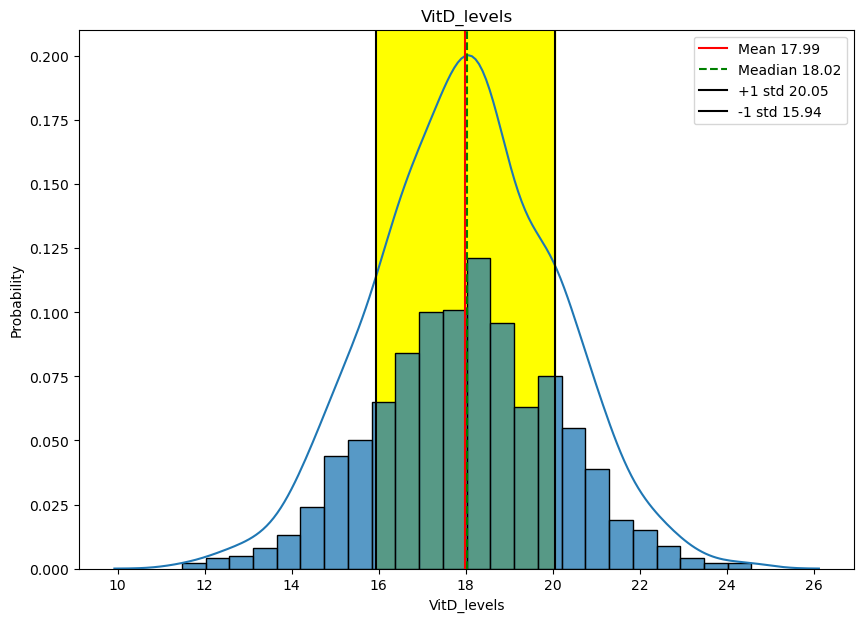

In [30]:
# lets plot our data
fig, ax = plt.subplots(figsize=(10,7))
sns.histplot(vitD_levels, ax=ax, stat='probability')
sns.kdeplot(vitD_levels)
ax.axvline(vitD_levels_mean, color='red', label=f'Mean {vitD_levels_mean:,.2f}')
ax.axvline(vitD_levels_median, ls='--', color='green',label=f'Meadian {vitD_levels_median:,.2f}')
ax.axvline(vitD_levels_plus_one_std, color='black', label=f"+1 std {vitD_levels_plus_one_std:,.2f}")
ax.axvline(vitD_levels_minus_one_std, color='black', label=f"-1 std {vitD_levels_minus_one_std:,.2f}")
ax.axvspan(vitD_levels_plus_one_std, vitD_levels_minus_one_std, color = 'yellow', zorder = 0)
ax.set_title('VitD_levels')
ax.legend();

In [41]:
calculate_kurtosis("VitD_levels")

Kurtosis: 3.0 Mesokurtic


Is it Discrete or Continuous?
* Continuous

Does it have a skew? If so, which direction (+/-)
* No skew

What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
* Mesokurtic


## lets work with Doc_visits

In [33]:
# lets creat a mean
doc_visits_mean = doc_visits.mean()
# lets creat a median
doc_visits_median = doc_visits.median()
# lets creat a standatr deviation
doc_visits_std = doc_visits.std()
# lets creat a standatr deviation + 1 from mean
doc_visits_plus_one_std = doc_visits_mean + doc_visits_std
# lets creat a standatr deviation - 1 from mean
doc_visits_minus_one_std = doc_visits_mean - doc_visits_std

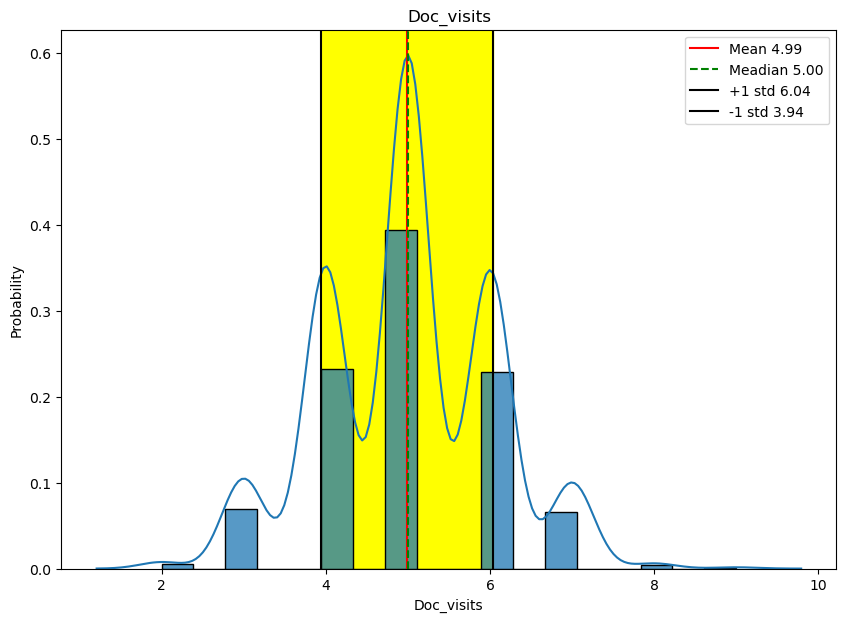

In [36]:
# lets plot our data
fig, ax = plt.subplots(figsize=(10,7))
sns.histplot(doc_visits, ax=ax, stat='probability')
sns.kdeplot(doc_visits)
ax.axvline(doc_visits_mean, color='red', label=f'Mean {doc_visits_mean:,.2f}')
ax.axvline(doc_visits_median, ls='--', color='green',label=f'Meadian {doc_visits_median:,.2f}')
ax.axvline(doc_visits_plus_one_std, color='black', label=f"+1 std {doc_visits_plus_one_std:,.2f}")
ax.axvline(doc_visits_minus_one_std, color='black', label=f"-1 std {doc_visits_minus_one_std:,.2f}")
ax.axvspan(doc_visits_plus_one_std, doc_visits_minus_one_std, color = 'yellow', zorder = 0)
ax.set_title('Doc_visits')
ax.legend();

In [42]:
calculate_kurtosis("Doc_visits")

Kurtosis: 3.0 Mesokurtic


Is it Discrete or Continuous?
* Discrete

Does it have a skew? If so, which direction (+/-)
* No skew

What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
* Mesokurtic

## lets work with TotalCharge

In [35]:
# lets creat a mean
totalCharge_mean = totalCharge.mean()
# lets creat a median
totalCharge_median = totalCharge.median()
# lets creat a standatr deviation
totalCharge_std = totalCharge.std()
# lets creat a standatr deviation + 1 from mean
totalCharge_plus_one_std = totalCharge_mean + totalCharge_std
# lets creat a standatr deviation - 1 from mean
totalCharge_minus_one_std = totalCharge_mean - totalCharge_std

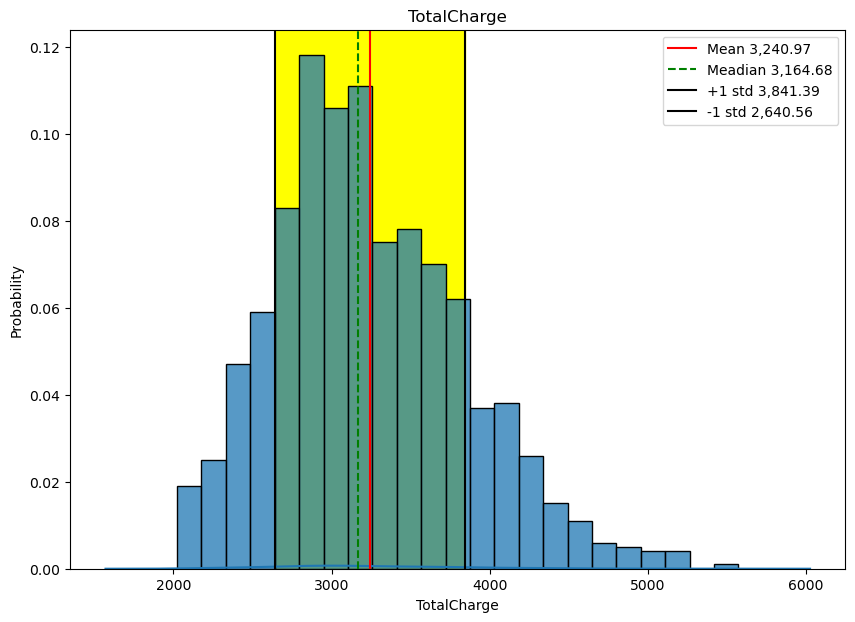

In [37]:
# lets plot our data
fig, ax = plt.subplots(figsize=(10,7))
sns.histplot(totalCharge, ax=ax, stat='probability')
sns.kdeplot(totalCharge)
ax.axvline(totalCharge_mean, color='red', label=f'Mean {totalCharge_mean:,.2f}')
ax.axvline(totalCharge_median, ls='--', color='green',label=f'Meadian {totalCharge_median:,.2f}')
ax.axvline(totalCharge_plus_one_std, color='black', label=f"+1 std {totalCharge_plus_one_std:,.2f}")
ax.axvline(totalCharge_minus_one_std, color='black', label=f"-1 std {totalCharge_minus_one_std:,.2f}")
ax.axvspan(totalCharge_plus_one_std, totalCharge_minus_one_std, color = 'yellow', zorder = 0)
ax.set_title('TotalCharge')
ax.legend();

In [43]:
calculate_kurtosis("TotalCharge")

Kurtosis: 3.3 Leptokurtic


Is it Discrete or Continuous?
* Continuous

Does it have a skew? If so, which direction (+/-)
* Positive

What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
* Leptokurtic